In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
#load dataset
netflix = pd.read_csv("netflix.csv")

#preview data
netflix

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429
...,...,...,...,...,...,...,...
4876,2021-10-05,640.390015,606.890015,606.940002,634.809998,9534300.0,634.809998
4877,2021-10-06,639.869995,626.359985,628.179993,639.099976,4580400.0,639.099976
4878,2021-10-07,646.840027,630.450012,642.229980,631.849976,3556900.0,631.849976
4879,2021-10-08,643.799988,630.859985,634.169983,632.659973,3271100.0,632.659973


In [3]:
#getting some basic details of the structure of the dataset
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4881 entries, 0 to 4880
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4881 non-null   object 
 1   High       4881 non-null   float64
 2   Low        4881 non-null   float64
 3   Open       4881 non-null   float64
 4   Close      4881 non-null   float64
 5   Volume     4881 non-null   float64
 6   Adj Close  4881 non-null   float64
dtypes: float64(6), object(1)
memory usage: 267.1+ KB


In [4]:
#Checking for any missing values
missing_values_count = netflix.isnull().sum()
print(missing_values_count)

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64


In [5]:
#No missing values, clean dataset; would do the following if dataset had missing values to fill in with the next value in the column
droprows = netflix.dropna()
print(netflix.shape, droprows.shape)

dropcolumns = netflix.dropna(axis=1)
print(netflix.shape, dropcolumns.shape)

cleaned_data = netflix.fillna(method='bfill', axis=0).fillna(0)
print(cleaned_data)

(4881, 7) (4881, 7)
(4881, 7) (4881, 7)
            Date        High         Low        Open       Close       Volume  \
0     2002-05-23    1.242857    1.145714    1.156429    1.196429  104790000.0   
1     2002-05-24    1.225000    1.197143    1.214286    1.210000   11104800.0   
2     2002-05-28    1.232143    1.157143    1.213571    1.157143    6609400.0   
3     2002-05-29    1.164286    1.085714    1.164286    1.103571    6757800.0   
4     2002-05-30    1.107857    1.071429    1.107857    1.071429   10154200.0   
...          ...         ...         ...         ...         ...          ...   
4876  2021-10-05  640.390015  606.890015  606.940002  634.809998    9534300.0   
4877  2021-10-06  639.869995  626.359985  628.179993  639.099976    4580400.0   
4878  2021-10-07  646.840027  630.450012  642.229980  631.849976    3556900.0   
4879  2021-10-08  643.799988  630.859985  634.169983  632.659973    3271100.0   
4880  2021-10-11  639.419983  626.780029  633.200012  627.039978    2

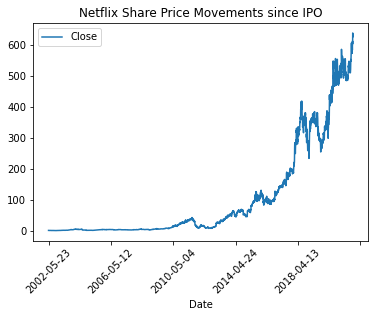

In [6]:
#plotting closing price
cleaned_data.plot(x="Date", y="Close", kind="line", rot=45, title="Netflix Share Price Movements since IPO")
plt.show()

In [7]:
# Chart does not provide much insight. Now we will slice the dataset to only analyse the data since 2018 (last five years).
# First we need to find the index of the date '2018-01-02'

print(cleaned_data.loc[cleaned_data['Date'] == '2018-01-02'])

            Date        High         Low        Open       Close      Volume  \
3930  2018-01-02  201.649994  195.419998  196.100006  201.070007  10966900.0   

       Adj Close  
3930  201.070007  


In [8]:
# Now we will slice the dataframe from index 3930 and with columns 0 to 6

netflix_analysis = cleaned_data.iloc[3930:, 0:6]

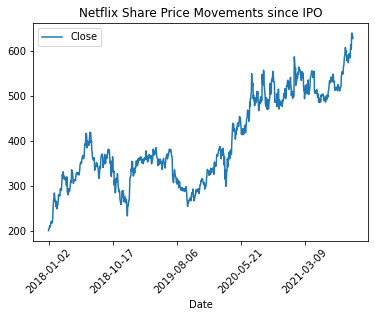

In [9]:
# Now we will plot closing price of the last five years

netflix_analysis.plot(x="Date", y="Close", kind="line", rot=45, title="Netflix Share Price Movements since IPO")
plt.show()

In [10]:
# The chart shows an increase in price over the last five years with some volatility throughout.
# Now we need to understand how the stock performed against a benchmark to gain some real insight.
# We will chose the S&P 500 as our benchmark and load the dataframe.

sp500 = pd.read_csv("sp500_index.csv")

#preview data
sp500

,Date,S&P500
0,2012-04-23,1366.94
1,2012-04-24,1371.97
2,2012-04-25,1390.69
3,2012-04-26,1399.98
4,2012-04-27,1403.36
...,...,...
2513,2022-04-18,4391.69
2514,2022-04-19,4462.21
2515,2022-04-20,4459.45
2516,2022-04-21,4393.66


In [11]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2518 non-null   object 
 1   S&P500  2518 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.5+ KB


In [12]:
#Checking for any missing values
missing_values_count = sp500.isnull().sum()
print(missing_values_count)

Date      0
S&P500    0
dtype: int64


In [13]:
# Our Netflix share price dataframe is from Dates 2018-01-01 to 2021-10-11. 
# No we need to find the index of these dates in the sp500 dataframe and slice it to make it comparable.

print(sp500.loc[sp500['Date'] == '2018-01-02'])
print(sp500.loc[sp500['Date'] == '2021-10-11'])

            Date   S&P500
1433  2018-01-02  2695.81
            Date   S&P500
2383  2021-10-11  4361.19


In [14]:
# Now we will slice the dataframe from index 1433 to 2383.

sp5001 = sp500.iloc[1433:2384, 0:]
sp5001

,Date,S&P500
1433,2018-01-02,2695.81
1434,2018-01-03,2713.06
1435,2018-01-04,2723.99
1436,2018-01-05,2743.15
1437,2018-01-08,2747.71
...,...,...
2379,2021-10-05,4345.72
2380,2021-10-06,4363.55
2381,2021-10-07,4399.76
2382,2021-10-08,4391.34


In [15]:
# We only need columns 'Date' and 'Close'in our netflix dataframe; so creating a new datafrae.

netflix1 = netflix_analysis[['Date', 'Close']].copy()
netflix1

,Date,Close
3930,2018-01-02,201.070007
3931,2018-01-03,205.050003
3932,2018-01-04,205.630005
3933,2018-01-05,209.990005
3934,2018-01-08,212.050003
...,...,...
4876,2021-10-05,634.809998
4877,2021-10-06,639.099976
4878,2021-10-07,631.849976
4879,2021-10-08,632.659973


In [16]:
# Now we join the two dataframes using the merge function.

netflix2 = netflix1.merge(sp5001)

In [17]:
# Renaming columns for clarity

netflix2.rename(columns = {'Close':'Netflix_share_price'}, inplace = True)
netflix2.rename(columns = {'S&P500':'SP500'}, inplace = True)


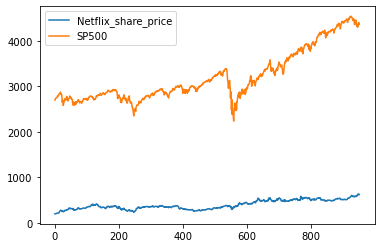

In [18]:
# plotting on graph

netflix2.plot()
plt.show()

In [19]:
# Prices of Netflix and S&P500 are not comparable as we can see above. The chart does not give much insight.
# Let's create two new columns for the daily price changes which would enable us to analyse the movements.

netflix2["Netflix_daily_price_change"]= netflix2.Netflix_share_price.pct_change(1)
netflix2["SP500_daily_price_change"]= netflix2.SP500.pct_change(1)
netflix2

,Date,Netflix_share_price,SP500,Netflix_daily_price_change,SP500_daily_price_change
0,2018-01-02,201.070007,2695.81,NaN,NaN
1,2018-01-03,205.050003,2713.06,0.019794,0.006399
2,2018-01-04,205.630005,2723.99,0.002829,0.004029
3,2018-01-05,209.990005,2743.15,0.021203,0.007034
4,2018-01-08,212.050003,2747.71,0.009810,0.001662
...,...,...,...,...,...
946,2021-10-05,634.809998,4345.72,0.052142,0.010524
947,2021-10-06,639.099976,4363.55,0.006758,0.004103
948,2021-10-07,631.849976,4399.76,-0.011344,0.008298
949,2021-10-08,632.659973,4391.34,0.001282,-0.001914


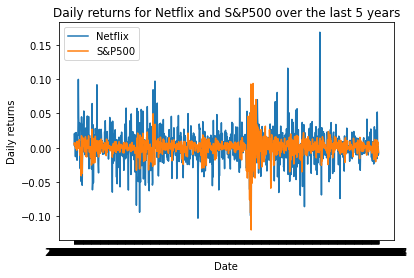

In [24]:
#plotting daily returns

plt.plot(netflix2.Date, netflix2.Netflix_daily_price_change)
plt.plot(netflix2.Date, netflix2.SP500_daily_price_change)
plt.legend(['Netflix', 'S&P500'])
plt.xlabel('Date')
plt.ylabel('Daily returns')
plt.title('Daily returns for Netflix and S&P500 over the last 5 years')
plt.show()